In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from numpy import random


In [2]:
df=pd.read_csv('D:\\Data_sets\\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
def gini(sample):
    prob=0
    for i in sample:
        prob+=(i/sum(sample))**2
        
    gini=1-prob
    return gini
    

In [6]:
data=df[['Pclass', 'Sex', 'Survived']]

In [7]:
data.head()

,Pclass,Sex,Survived
0,3,male,0
1,1,female,1
2,3,female,1
3,1,female,1
4,3,male,0


<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

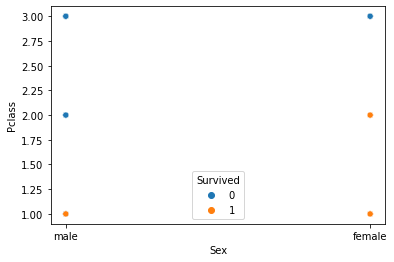

In [8]:
sns.scatterplot(y=df.Pclass,x= df.Sex, data=df, hue='Survived')

In [9]:
sex_map={
    'female':0, 'male':1
}

In [10]:
data.Sex=data.Sex.map(sex_map)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
data

,Pclass,Sex,Survived
0,3,1,0
1,1,0,1
2,3,0,1
3,1,0,1
4,3,1,0
...,...,...,...
886,2,1,0
887,1,0,1
888,3,0,0
889,1,1,1


In [12]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
data.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

pclass 1,2,3

1+2/2=1.5

2+3/2=2.5

for sex= 0+1/2= 0.5


In [14]:
gini([549,342])

0.4730129578614428

In [15]:
data[data.Pclass <=1.5].Survived.value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [16]:
gini([80,136])

0.46639231824417005

In [17]:
data[data.Pclass > 1.5].Survived.value_counts()

0    469
1    206
Name: Survived, dtype: int64

In [18]:
gini([469,206])

0.4240943758573389

In [19]:
data[data.Pclass <=2.5].Survived.value_counts()

1    223
0    177
Name: Survived, dtype: int64

In [20]:
gini([177,223])

0.4933875

In [21]:
data[data.Pclass > 2.5].Survived.value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [22]:
gini([372,119])

0.3672458634234965

In [23]:
data[data.Sex <= 0.5].Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [24]:
gini([81,233])

0.3828350034484158

In [25]:
data[data.Sex > 0.5].Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [26]:
gini([468,109])

0.3064437162277842

In [27]:
def calculate_overall_gini(data_below, data_above):
    
    total_sum = sum(data_below) +sum(data_above)
    p_data_below = sum(data_below)/total_sum
    p_data_above = sum(data_above) /total_sum

    overall_entropy =  (p_data_below * gini(data_below) 
                      + p_data_above * gini(data_above))
    
    return overall_entropy

In [28]:
# Pclass <=1.5
calculate_overall_gini([80,136],[469,206])

0.4343484224965707

In [29]:
# Pclass <=2.5
calculate_overall_gini([177,223],[372,119])

0.4238751054331502

In [30]:
# sex <=0.5
calculate_overall_gini([81,233],[468,109])

0.3333650003885904

In [31]:
data[(data.Sex <= 0.5) & (data.Pclass <=1.5)].Survived.value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [32]:
gini([3,91])

0.06179266636487091

In [33]:
data[(data.Sex <= 0.5) & (data.Pclass >1.5)].Survived.value_counts()

1    142
0     78
Name: Survived, dtype: int64

In [34]:
gini([78,142])

0.45768595041322313

In [35]:
calculate_overall_gini([3,91],[78,142])

0.33917012652613676

In [36]:
data[(data.Sex <= 0.5) & (data.Pclass <=2.5)].Survived.value_counts()

1    161
0      9
Name: Survived, dtype: int64

In [37]:
data[(data.Sex <= 0.5) & (data.Pclass >2.5)].Survived.value_counts()

0    72
1    72
Name: Survived, dtype: int64

In [38]:
calculate_overall_gini([9,161],[72,72])

0.2835893593106033

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [40]:
dc=DecisionTreeClassifier(max_depth=4)

In [41]:
data

,Pclass,Sex,Survived
0,3,1,0
1,1,0,1
2,3,0,1
3,1,0,1
4,3,1,0
...,...,...,...
886,2,1,0
887,1,0,1
888,3,0,0
889,1,1,1


In [42]:
X=data.drop('Survived', axis=1)
y=data.Survived
dc.fit(X, y)

DecisionTreeClassifier(max_depth=4)

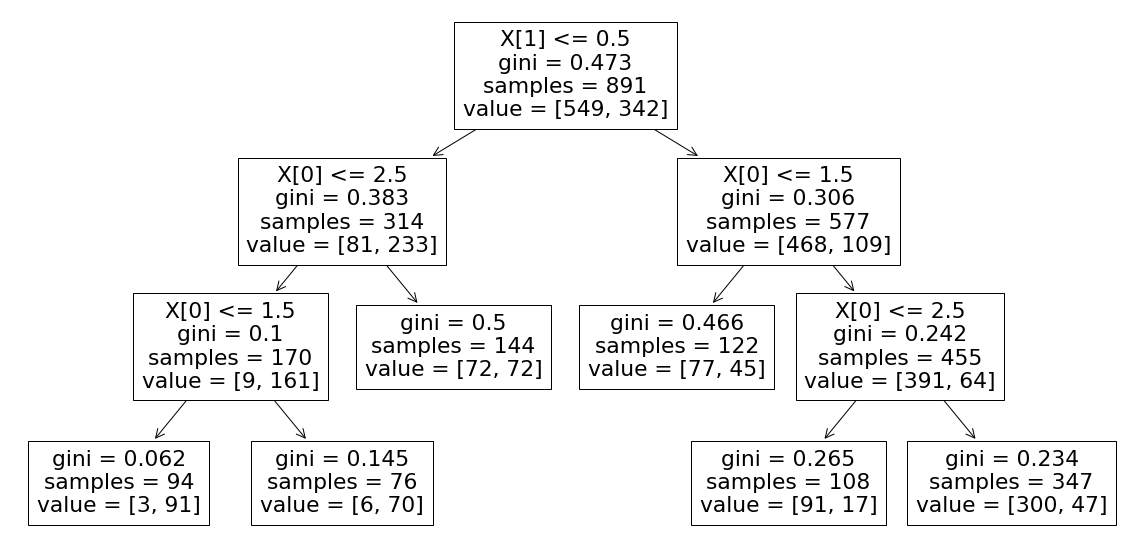

In [43]:
plt.figure(figsize=(20,10))
plot_tree(dc)
plt.show()

In [59]:
import random

In [60]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
#     print(indices)
    
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [61]:
random.seed(0)
train_df, test_df = train_test_split(data, test_size=0.2)

In [64]:
train_df.Survived.value_counts()

0    441
1    272
Name: Survived, dtype: int64

In [65]:
X1=train_df.drop('Survived', axis=1)

In [66]:
y1=train_df.Survived

In [72]:
dc2=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [73]:
dc2.fit(X1, y1)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

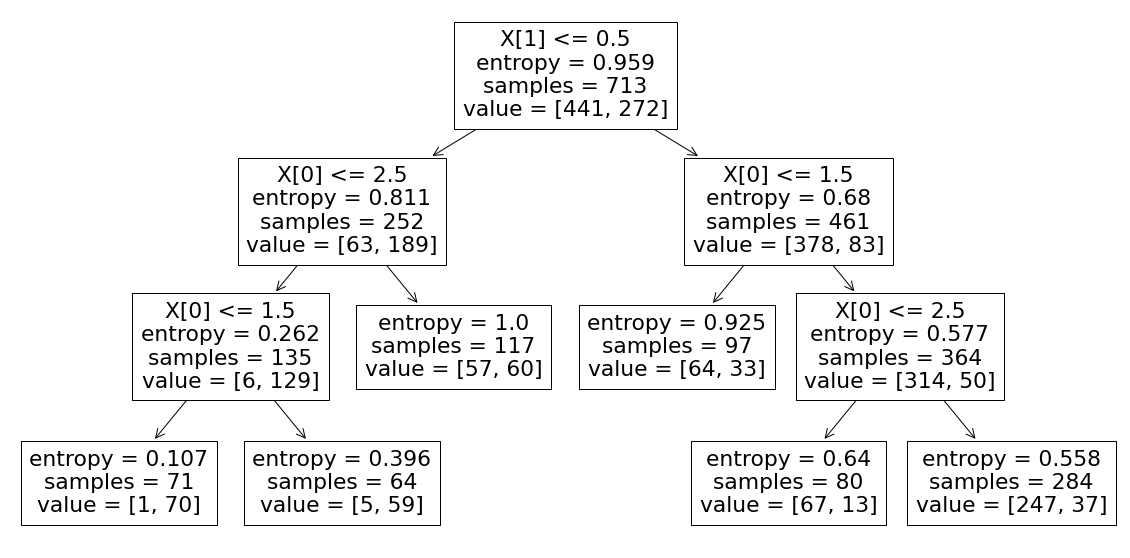

In [74]:
plt.figure(figsize=(20,10))
plot_tree(dc2)
plt.show()